<a href="https://colab.research.google.com/github/2714830587-xh/testgit/blob/master/%E8%87%AA%E5%8A%A8%E5%BE%AE%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **深度学习框架可以自动计算导数**我们首先将梯度附加到想要对其计算偏导数的变量上。然后我们记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

为什么计算二阶导数比一阶导数的开销要更大？

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

在控制流的例子中，我们计算d关于a的导数，如果我们将变量a更改为随机向量或矩阵，会发生什么？

重新设计一个求控制流梯度的例子，运行并分析结果。

使 f(x)=sin(x)f(x)=sin⁡(x) ，绘制 f(x)f(x) 和 df(x)dxdf(x)dx 的图像，其中后者不使用 f′(x)=cos(x)f′(x)=cos⁡(x) 。

In [ ]:
# Question2:

# import torch
# x = torch.arange(40.,requires_grad=True)
# y = 2 * torch.dot(x**2,torch.ones_like(x))
# y.backward()
# x.grad
# y.backward() <======== If run backward the second time we will have run time error as below
# RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

# If we use y.backward(retain_graph=True) then we can run y.backward() again as it will do one more time the computation graph

# Question3:

# def f(a):
# b = a * 2
# while b.norm() < 1000:
# print("\n",b.norm())
# b = b * 2
# if b.sum() > 0:
# c = b
# print(“C==b\n”,c)
# else:
# c = 100 * b
# print(“c=100b\n”,c)
# return c

# a = torch.randn(size=(3,1), requires_grad=True)
# print(a.shape)
# print(a)
# d = f(a)
# d.backward() #<====== run time error if a is vector or matrix RuntimeError: grad can be implicitly created only for scalar outputs
# d.sum().backward() #<===== this way it will work
# print(d)

In [31]:
#Q3,Q4
import torch
import math
def f(a):
    b = a * 2+abs(a)
    c=b+a**2
    return c
a = torch.randn(size=(1,3), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a



tensor([[False, False, False]])

<class 'torch.Tensor'>


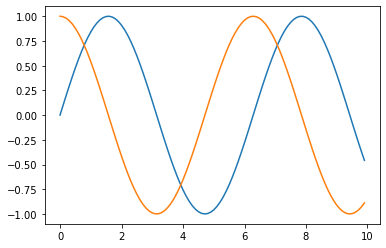

In [64]:
import math
import numpy
import matplotlib.pyplot as plt
x=torch.arange(0.,10.,0.1)
x.requires_grad_(True)
y=torch.sin(x)
y.sum().backward()
#x,y,x_grad,都是tensor而在matplotlib上需要转化为numpy
#无法在需要 grad 的张量上调用 numpy()。改用 tensor.detach().numpy()
print(type(x.grad))

x1=x.detach().numpy()
y1=y.detach().numpy()
x_grad_np=x.grad.detach().numpy()
plt.plot(x1,y1)
plt.plot(x1,x_grad_np)

<class 'torch.Tensor'>


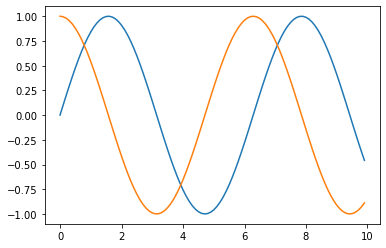

In [65]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0,10,0.1)
x.requires_grad_(True)
x1 = x.detach()
print(type(x1))
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)